In [1]:
import numpy as np   
import cv2
from PIL import Image
from IPython.display import display
from flexible_cropping import crop_image_and_labels, color
from interactive_map   import show_tile, show_crop

In [2]:
LABEL_DIR   = '/data/satlas_pretrain/labels_static/static/' 
data_folder = '/data/satlas_pretrain/naip/'

tile_x, tile_y = 1500, 2885
img_path = data_folder + f'naip_2019_{tile_x}_{tile_y}_tci.npy'
json_file = LABEL_DIR + f'{tile_x}_{tile_y}/vector.json'

img_path  = '/home/ghahramani/naip_2019_1500_2885_tci.npy' #hardcoded by now
json_file = '/home/ghahramani/vector.json'                 #hardcoded by now

In [29]:
crop = [5000, 4000, 6000, 6000]
zoom_start = 13

m = show_tile(tile_x, tile_y, zoom_start=zoom_start)
m = show_crop(tile_x, tile_y, crop, m=m, zoom_start=zoom_start)
display(m)


(2000, 1000, 3)


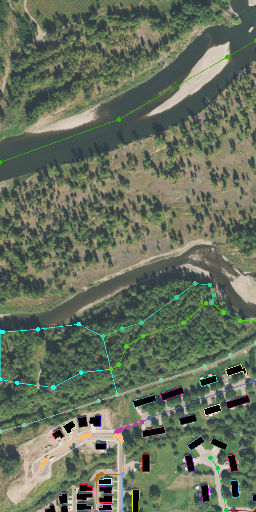

In [30]:
cropped_image, cropped_vector, org_vector = crop_image_and_labels(img_path, json_file, crop)
cropped_image_np = np.array(cropped_image)
for cat, vals in cropped_vector.items(): 
    for att in vals:
        Geotype  = att['Geometry']['Type'].lower()
        for geoK, geoV in att['Geometry'].items():
            if geoK.lower() == Geotype:
                if Geotype == 'polygon' and geoV:
                    for polyG in geoV:
                        filtered = np.array(polyG, np.int32)
                        cropped_image_np = cv2.fillPoly(cropped_image_np, [filtered], (0,0,0))
                        cropped_image_np = cv2.polylines(cropped_image_np, [filtered], isClosed=True, color=color(), thickness=2)
                elif Geotype == 'polyline' and geoV:
                    filtered = np.array(geoV, np.int32)
                    C = color()
                    cropped_image_np = cv2.polylines(cropped_image_np, [filtered], isClosed=False, color=C, thickness=2)
                    for pt in filtered:
                        cropped_image_np = cv2.circle(cropped_image_np, tuple(pt), radius=9, color=C, thickness=-1)
                elif Geotype == 'point':
                    filtered = np.array([geoV], np.int32)
                    cropped_image_np = cv2.circle(cropped_image_np, filtered[0], radius=4, color=(255,255,255), thickness=4)

cropped_image_np = cropped_image_np[..., ::-1] #BGR to RGB
u, v = cropped_image_np.shape[0], cropped_image_np.shape[1]
print(cropped_image_np.shape)
display(Image.fromarray(cv2.resize(cropped_image_np, (int(768*v/(u+v)), int(768*u/(u+v))))))

In [ ]:
#Now time to add earthdial's preprocesing steps!